In [8]:
import pandas as pd
import numpy as np


In [20]:
conductor_ranks = pd.read_csv(r'C:\HD\hd\hd\Projects\Int SEO Data Analysis\Updated Data\2022 Conductor ranks.csv')

In [21]:
conductor_ranks

,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL
0,homemade wine rack,24,26.0,DIY Wine Rack - The Home Depot Canada,2022-06-05,NaN
1,skylink,24,29.0,Skylink Net Alarm System Starter Kit - The Hom...,2022-06-05,NaN
2,handyman Victoria,24,33.0,Victoria Handyman Services - Home Depot,2022-06-05,NaN
3,living lighting newmarket,24,35.0,Weekly Flyer | The Home Depot Canada,2022-06-05,NaN
4,halloween black cat,24,51.0,Home Accents Holiday 3.5 ft. Black Cat on Jack...,2022-06-05,NaN
...,...,...,...,...,...,...
621351,pest control,3,100.0,Pest & Insect Control(458 products) - The Home...,2022-01-09,https://www.homedepot.ca/en/home/categories/ou...
621352,insulated roll up door,3,100.0,Double & Single Garage Doors | The Home Depot ...,2022-01-09,NaN
621353,murphy oil calgary,3,100.0,Murphy Oil 3.78 Soap Original | The Home Depot...,2022-01-09,NaN
621354,door frame thickness,5,100.0,"LIF INDUSTRIES, INC 32x80 Steel Knockdown Door...",2022-01-23,NaN


In [29]:
conductor_ranks['Date'] = pd.to_datetime(conductor_ranks['Date'])
conductor_ranks_after_june = conductor_ranks[conductor_ranks['Date'] > '2022-06-01']

In [32]:
df = conductor_ranks_after_june.copy()

In [31]:
conductor_ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621356 entries, 0 to 621355
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Query_Phrase   621356 non-null  object        
 1   Week_Number    621356 non-null  int64         
 2   True_Rank      621095 non-null  float64       
 3   Page_Name      621354 non-null  object        
 4   Date           621356 non-null  datetime64[ns]
 5   Preferred_URL  83744 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.4+ MB


In [34]:
new_df = []
for query_phrase, dfx in df.groupby("Query_Phrase"):
    missing_weeks = set(range(23, 52)) - set(dfx['Week_Number'])
    dfx["True_Rank_Filled"] = np.nan
    new_rows = [{'Query_Phrase': dfx['Query_Phrase'].iloc[0], 'Week_Number': int(wk), 'True_Rank_Filled': 101} for wk in missing_weeks]
    y = pd.concat([dfx, pd.DataFrame(new_rows)], ignore_index=True)
    y["True_Rank_Filled"].fillna(y["True_Rank"], inplace=True)
    # display(dfx)
    y['Date'] = pd.to_datetime('2022', format='%Y') + pd.to_timedelta((y['Week_Number'] ) * 7 - pd.to_datetime('2022', format='%Y').isocalendar()[2] , unit='D')
    # display(y)
    new_df.append(y)

pd.concat(new_df, ignore_index=True).to_csv("2023IntSEOUpdated.csv")

In [33]:
df

,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL
0,homemade wine rack,24,26.0,DIY Wine Rack - The Home Depot Canada,2022-06-05,NaN
1,skylink,24,29.0,Skylink Net Alarm System Starter Kit - The Hom...,2022-06-05,NaN
2,handyman Victoria,24,33.0,Victoria Handyman Services - Home Depot,2022-06-05,NaN
3,living lighting newmarket,24,35.0,Weekly Flyer | The Home Depot Canada,2022-06-05,NaN
4,halloween black cat,24,51.0,Home Accents Holiday 3.5 ft. Black Cat on Jack...,2022-06-05,NaN
...,...,...,...,...,...,...
508438,canadian springs kelowna,31,100.0,"Water Coolers, Water Dispensers | The Home Dep...",2022-07-24,NaN
508439,black friday deals,31,100.0,Black Friday Deals 2021 | The Home Depot Canada,2022-07-24,https://www.homedepot.ca/en/home/categories/al...
508440,flooring fitters,31,100.0,Laminate Flooring Installation | The Home Depo...,2022-07-24,https://www.homedepot.ca/en/home/home-services...
508441,how to pick basil from a plant,31,100.0,"How to Grow, Care for & Harvest Basil - Home D...",2022-07-24,https://www.homedepot.ca/en/home/ideas-how-to/...


In [35]:
Int_SEO_Updated = pd.read_csv("2023IntSEOUpdated.csv")

In [43]:
Int_SEO_Updated[Int_SEO_Updated['Query_Phrase']=='snow blowers'].sort_values(by='Week_Number')

,Unnamed: 0,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled
423073,423073,snow blowers,23,NaN,NaN,2022-06-05,NaN,101.0
423074,423074,snow blowers,24,NaN,NaN,2022-06-12,NaN,101.0
423075,423075,snow blowers,25,NaN,NaN,2022-06-19,NaN,101.0
423076,423076,snow blowers,26,NaN,NaN,2022-06-26,NaN,101.0
423048,423048,snow blowers,27,5.0,Snowblowers | The Home Depot Canada,2022-07-03,NaN,5.0
423065,423065,snow blowers,28,8.0,Snowblowers - The Home Depot Canada,2022-07-10,NaN,8.0
423077,423077,snow blowers,29,NaN,NaN,2022-07-17,NaN,101.0
423078,423078,snow blowers,30,NaN,NaN,2022-07-24,NaN,101.0
423066,423066,snow blowers,31,8.0,Snowblowers | The Home Depot Canada,2022-07-31,NaN,8.0
423067,423067,snow blowers,32,NaN,NaN,2022-08-07,NaN,101.0


In [48]:
Unique_Phraes = pd.Series(Int_SEO_Updated['Query_Phrase'].unique())


In [54]:
Unique_Phraes.to_csv('query_phrases.csv')

In [65]:
MSVs = pd.read_csv(r'C:\HD\hd\hd\Projects\Int SEO Data Analysis\Updated Data\query_phrases.csv')

In [66]:
MSVs

,Unnamed: 0,Query_Phrase,MSV
0,0,.2 micron filter,0.0
1,1,0 2 micron,10.0
2,2,0.5 micron water filter,0.0
3,3,0.5 micron water filter cartridge,0.0
4,4,0.5 micron whole house water filter,0.0
...,...,...,...
16327,16327,zero water vs brita,320.0
16328,16328,zinsser,590.0
16329,16329,zinsser cover stain,320.0
16330,16330,zinsser primer,1300.0


In [67]:
Int_SEO_Updated_MSV = pd.merge(Int_SEO_Updated,MSVs, on='Query_Phrase')

In [68]:
Int_SEO_Updated_MSV

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV
0,0,.2 micron filter,26,33.0,Replacement Water Filters & Cartridges(220 pro...,2022-06-26,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0
1,1,.2 micron filter,27,27.0,Replacement Water Filters & Cartridges(220 pro...,2022-07-03,https://www.homedepot.ca/en/home/categories/ki...,27.0,0,0.0
2,2,.2 micron filter,37,22.0,Water Filter Replacement & Filter Cartridges -...,2022-09-11,https://www.homedepot.ca/en/home/categories/ki...,22.0,0,0.0
3,3,.2 micron filter,38,45.0,Replacement Water Filters & Cartridges - Home ...,2022-09-18,https://www.homedepot.ca/en/home/categories/ki...,45.0,0,0.0
4,4,.2 micron filter,39,32.0,Replacement Water Filters & Cartridges - Home ...,2022-09-25,https://www.homedepot.ca/en/home/categories/ki...,32.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
519098,519098,zinsser watertite,29,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-17,NaN,4.0,16331,170.0
519099,519099,zinsser watertite,30,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-24,NaN,4.0,16331,170.0
519100,519100,zinsser watertite,28,5.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-10,NaN,5.0,16331,170.0
519101,519101,zinsser watertite,26,NaN,NaN,2022-06-26,NaN,101.0,16331,170.0


In [70]:
Int_SEO_Updated_MSV['Anomaly'] = Int_SEO_Updated_MSV['True_Rank_Filled'].apply(lambda x: 1 if x == 101 else 0)


In [71]:
Int_SEO_Updated_MSV

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV,Anomaly
0,0,.2 micron filter,26,33.0,Replacement Water Filters & Cartridges(220 pro...,2022-06-26,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0,0
1,1,.2 micron filter,27,27.0,Replacement Water Filters & Cartridges(220 pro...,2022-07-03,https://www.homedepot.ca/en/home/categories/ki...,27.0,0,0.0,0
2,2,.2 micron filter,37,22.0,Water Filter Replacement & Filter Cartridges -...,2022-09-11,https://www.homedepot.ca/en/home/categories/ki...,22.0,0,0.0,0
3,3,.2 micron filter,38,45.0,Replacement Water Filters & Cartridges - Home ...,2022-09-18,https://www.homedepot.ca/en/home/categories/ki...,45.0,0,0.0,0
4,4,.2 micron filter,39,32.0,Replacement Water Filters & Cartridges - Home ...,2022-09-25,https://www.homedepot.ca/en/home/categories/ki...,32.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
519098,519098,zinsser watertite,29,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-17,NaN,4.0,16331,170.0,0
519099,519099,zinsser watertite,30,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-24,NaN,4.0,16331,170.0,0
519100,519100,zinsser watertite,28,5.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-10,NaN,5.0,16331,170.0,0
519101,519101,zinsser watertite,26,NaN,NaN,2022-06-26,NaN,101.0,16331,170.0,1


In [83]:
Number_of_anamolies_2022 = Int_SEO_Updated_MSV.groupby('Query_Phrase').agg({'MSV': 'first', 'Anomaly': 'sum'}).sort_values(by='Anomaly', ascending=False)


In [86]:
Number_of_anamolies_2022.to_csv('Number_of_anamolies_2022.csv')

In [84]:
Number_of_anamolies_2022

,MSV,Anomaly
Query_Phrase,,
abs drain pipe,110.0,29
cheap floor lamps,170.0,29
work glasses,110.0,29
how to shim a door,70.0,29
work gloves with grip,50.0,29
...,...,...
gas fireplace installation cost,140.0,1
round bowl toilet,50.0,1
round bed canada,90.0,1


In [87]:
conductor_ranks_2023 = pd.read_csv(r'C:\HD\hd\hd\Projects\Int SEO Data Analysis\Updated Data\2023_Conductor_Ranks.csv')

In [88]:
df2 = conductor_ranks_2023.copy()

In [89]:
new_df = []
for query_phrase, dfx in df2.groupby("Query_Phrase"):
    missing_weeks = set(range(1, 21)) - set(dfx['Week_Number'])
    dfx["True_Rank_Filled"] = np.nan
    new_rows = [{'Query_Phrase': dfx['Query_Phrase'].iloc[0], 'Week_Number': int(wk), 'True_Rank_Filled': 101} for wk in missing_weeks]
    y = pd.concat([dfx, pd.DataFrame(new_rows)], ignore_index=True)
    y["True_Rank_Filled"].fillna(y["True_Rank"], inplace=True)
    # display(dfx)
    y['Date'] = pd.to_datetime('2023', format='%Y') + pd.to_timedelta((y['Week_Number'] ) * 7 - pd.to_datetime('2023', format='%Y').isocalendar()[2] , unit='D')
    # display(y)
    new_df.append(y)

pd.concat(new_df, ignore_index=True).to_csv("2023IntSEOUpdated2.csv")

In [91]:
Int_SEO_Updated_2023 = pd.read_csv("2023IntSEOUpdated2.csv")

In [92]:
Int_SEO_Updated_MSV_2023 = pd.merge(Int_SEO_Updated_2023,MSVs, on='Query_Phrase')

In [93]:
Int_SEO_Updated_MSV_2023['Anomaly'] = Int_SEO_Updated_MSV_2023['True_Rank_Filled'].apply(lambda x: 1 if x == 101 else 0)

In [94]:
Number_of_anamolies_2023 = Int_SEO_Updated_MSV_2023.groupby('Query_Phrase').agg({'MSV': 'first', 'Anomaly': 'sum'}).sort_values(by='Anomaly', ascending=False)


In [96]:
Number_of_anamolies_2023

,MSV,Anomaly
Query_Phrase,,
dryer parts,720.0,20
mantle garland,320.0,20
rolling garment rack,70.0,20
standard closet door size,110.0,20
winter preparation,70.0,20
...,...,...
international concepts,140.0,0
international furniture,880.0,0
international tool boxes,590.0,0


In [97]:
Int_SEO_Updated_MSV_2023

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV,Anomaly
0,0,.2 micron filter,18,43.0,Replacement Water Filters & Cartridges(222 pro...,2023-04-30,https://www.homedepot.ca/en/home/categories/ki...,43.0,0,0.0,0
1,1,.2 micron filter,16,44.0,Replacement Water Filters & Cartridges(222 pro...,2023-04-16,https://www.homedepot.ca/en/home/categories/ki...,44.0,0,0.0,0
2,2,.2 micron filter,19,40.0,Replacement Water Filters & Cartridges(222 pro...,2023-05-07,https://www.homedepot.ca/en/home/categories/ki...,40.0,0,0.0,0
3,3,.2 micron filter,20,48.0,Replacement Water Filters & Cartridges(222 pro...,2023-05-14,https://www.homedepot.ca/en/home/categories/ki...,48.0,0,0.0,0
4,4,.2 micron filter,21,40.0,Replacement Water Filters & Cartridges(222 pro...,2023-05-21,https://www.homedepot.ca/en/home/categories/ki...,40.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
345548,377307,zinsser watertite,11,13.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2023-03-12,NaN,13.0,16331,170.0,0
345549,377308,zinsser watertite,12,2.0,Zinsser Watertite LX Mold & Mildew Proof Water...,2023-03-19,NaN,2.0,16331,170.0,0
345550,377309,zinsser watertite,12,13.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2023-03-19,NaN,13.0,16331,170.0,0
345551,377310,zinsser watertite,13,3.0,Zinsser Watertite LX Mold & Mildew Proof Water...,2023-03-26,NaN,3.0,16331,170.0,0


In [99]:
Int_SEO_Updated_MSV

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV,Anomaly
0,0,.2 micron filter,26,33.0,Replacement Water Filters & Cartridges(220 pro...,2022-06-26,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0,0
1,1,.2 micron filter,27,27.0,Replacement Water Filters & Cartridges(220 pro...,2022-07-03,https://www.homedepot.ca/en/home/categories/ki...,27.0,0,0.0,0
2,2,.2 micron filter,37,22.0,Water Filter Replacement & Filter Cartridges -...,2022-09-11,https://www.homedepot.ca/en/home/categories/ki...,22.0,0,0.0,0
3,3,.2 micron filter,38,45.0,Replacement Water Filters & Cartridges - Home ...,2022-09-18,https://www.homedepot.ca/en/home/categories/ki...,45.0,0,0.0,0
4,4,.2 micron filter,39,32.0,Replacement Water Filters & Cartridges - Home ...,2022-09-25,https://www.homedepot.ca/en/home/categories/ki...,32.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
519098,519098,zinsser watertite,29,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-17,NaN,4.0,16331,170.0,0
519099,519099,zinsser watertite,30,4.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-24,NaN,4.0,16331,170.0,0
519100,519100,zinsser watertite,28,5.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2022-07-10,NaN,5.0,16331,170.0,0
519101,519101,zinsser watertite,26,NaN,NaN,2022-06-26,NaN,101.0,16331,170.0,1


In [100]:
merged_df = pd.concat([Int_SEO_Updated_MSV, Int_SEO_Updated_MSV_2023])


In [102]:
merged_df

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV,Anomaly
0,0,.2 micron filter,26,33.0,Replacement Water Filters & Cartridges(220 pro...,2022-06-26,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0,0
1,1,.2 micron filter,27,27.0,Replacement Water Filters & Cartridges(220 pro...,2022-07-03,https://www.homedepot.ca/en/home/categories/ki...,27.0,0,0.0,0
2,2,.2 micron filter,37,22.0,Water Filter Replacement & Filter Cartridges -...,2022-09-11,https://www.homedepot.ca/en/home/categories/ki...,22.0,0,0.0,0
3,3,.2 micron filter,38,45.0,Replacement Water Filters & Cartridges - Home ...,2022-09-18,https://www.homedepot.ca/en/home/categories/ki...,45.0,0,0.0,0
4,4,.2 micron filter,39,32.0,Replacement Water Filters & Cartridges - Home ...,2022-09-25,https://www.homedepot.ca/en/home/categories/ki...,32.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
345548,377307,zinsser watertite,11,13.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2023-03-12,NaN,13.0,16331,170.0,0
345549,377308,zinsser watertite,12,2.0,Zinsser Watertite LX Mold & Mildew Proof Water...,2023-03-19,NaN,2.0,16331,170.0,0
345550,377309,zinsser watertite,12,13.0,Zinsser Watertite Mould & Mildew Proof Waterpr...,2023-03-19,NaN,13.0,16331,170.0,0
345551,377310,zinsser watertite,13,3.0,Zinsser Watertite LX Mold & Mildew Proof Water...,2023-03-26,NaN,3.0,16331,170.0,0


In [103]:
merged_df[merged_df['Query_Phrase']=='.2 micron filter']

,Unnamed: 0_x,Query_Phrase,Week_Number,True_Rank,Page_Name,Date,Preferred_URL,True_Rank_Filled,Unnamed: 0_y,MSV,Anomaly
0,0,.2 micron filter,26,33.0,Replacement Water Filters & Cartridges(220 pro...,2022-06-26,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0,0
1,1,.2 micron filter,27,27.0,Replacement Water Filters & Cartridges(220 pro...,2022-07-03,https://www.homedepot.ca/en/home/categories/ki...,27.0,0,0.0,0
2,2,.2 micron filter,37,22.0,Water Filter Replacement & Filter Cartridges -...,2022-09-11,https://www.homedepot.ca/en/home/categories/ki...,22.0,0,0.0,0
3,3,.2 micron filter,38,45.0,Replacement Water Filters & Cartridges - Home ...,2022-09-18,https://www.homedepot.ca/en/home/categories/ki...,45.0,0,0.0,0
4,4,.2 micron filter,39,32.0,Replacement Water Filters & Cartridges - Home ...,2022-09-25,https://www.homedepot.ca/en/home/categories/ki...,32.0,0,0.0,0
5,5,.2 micron filter,40,34.0,Water Filter Replacement & Filter Cartridges -...,2022-10-02,https://www.homedepot.ca/en/home/categories/ki...,34.0,0,0.0,0
6,6,.2 micron filter,43,33.0,Replacement Water Filters & Cartridges(221 pro...,2022-10-23,https://www.homedepot.ca/en/home/categories/ki...,33.0,0,0.0,0
7,7,.2 micron filter,42,56.0,Water Filter Replacement & Filter Cartridges -...,2022-10-16,https://www.homedepot.ca/en/home/categories/ki...,56.0,0,0.0,0
8,8,.2 micron filter,49,21.0,Water Filter Replacement & Filter Cartridges -...,2022-12-04,https://www.homedepot.ca/en/home/categories/ki...,21.0,0,0.0,0
9,9,.2 micron filter,33,30.0,Replacement Water Filters & Cartridges(220 pro...,2022-08-14,https://www.homedepot.ca/en/home/categories/ki...,30.0,0,0.0,0


In [105]:
merged_df.set_index('Date', inplace=True)


In [110]:
merged_df.index

DatetimeIndex(['2022-06-26', '2022-07-03', '2022-09-11', '2022-09-18',
               '2022-09-25', '2022-10-02', '2022-10-23', '2022-10-16',
               '2022-12-04', '2022-08-14',
               ...
               '2023-02-26', '2023-02-26', '2023-03-05', '2023-03-05',
               '2023-03-12', '2023-03-12', '2023-03-19', '2023-03-19',
               '2023-03-26', '2023-03-26'],
              dtype='datetime64[ns]', name='Date', length=864656, freq=None)

<AxesSubplot:xlabel='Date'>

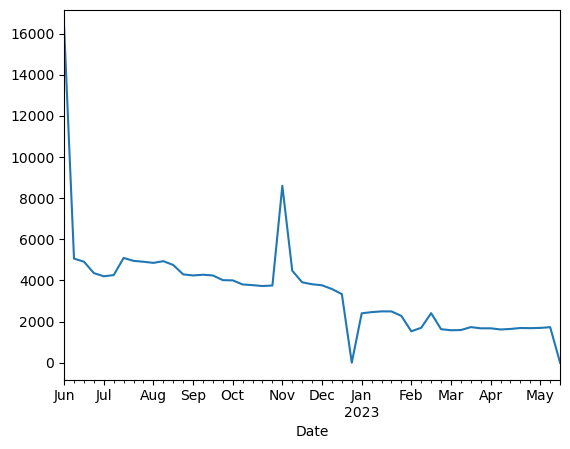

In [121]:
merged_df.groupby('Date').sum()['Anomaly'].plot()

<AxesSubplot:xlabel='Date'>

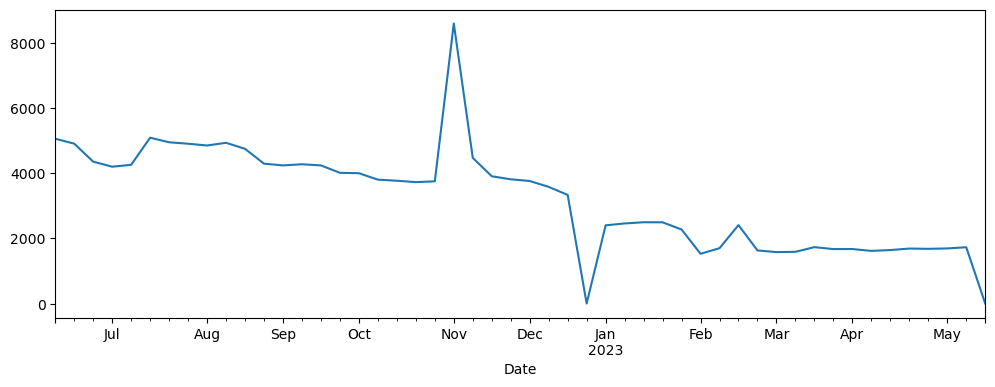

In [127]:
merged_df[merged_df.index >'2022-06-05'].groupby('Date').sum()['Anomaly'].plot(figsize=(12,4))

In [129]:
anamolies_by_week = merged_df[merged_df.index >'2022-06-05'].groupby('Date').sum()['Anomaly']

In [132]:
anamolies_by_week.to_csv('Anamolies_by_week.csv')

In [135]:
queries = merged_df['Query_Phrase'].unique()

In [142]:
merged_df_filtered = merged_df.groupby('Query_Phrase').agg({'MSV': 'first', 'Anomaly': 'sum'}).sort_values(by='Anomaly')


In [145]:
merged_df_filtered.to_csv('FinalUpdatedIntSEO2023.csv')